MODEL TRAINING

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('data/thyroid_data.csv')

In [3]:
data.head()

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative


In [4]:
data=data.drop([ 'S.no','On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
        'TSH Measured','Hypopituitary','Psych',
       'T3 Measured',  'TT4 Measured', 'T4U Measured', 
       'FTI Measured'],axis=1)

In [5]:
data.head()

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,TSH,T3,TT4,T4U,FTI,Category
0,41,F,f,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23,F,f,f,f,f,f,4.1,2,102,?,?,negative
2,46,M,f,f,f,f,f,0.98,?,109,0.91,120,negative
3,70,F,f,f,f,f,f,0.16,1.9,175,?,?,negative
4,70,F,f,f,f,f,f,0.72,1.2,61,0.87,70,negative


In [6]:
data['Sex'].unique()

array(['F', 'M', '?'], dtype=object)

In [7]:
data[~data.Age.str.isnumeric()]

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,TSH,T3,TT4,T4U,FTI,Category
1962,?,F,f,f,f,f,f,0.6,1.5,120,0.82,146,negative


In [8]:
data=data.drop(data.index[1962])


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3220
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              3220 non-null   object
 1   Sex              3220 non-null   object
 2   Sick             3220 non-null   object
 3   Pregnant         3220 non-null   object
 4   Thyroid Surgery  3220 non-null   object
 5   Goitre           3220 non-null   object
 6   Tumor            3220 non-null   object
 7   TSH              3220 non-null   object
 8   T3               3220 non-null   object
 9   TT4              3220 non-null   object
 10  T4U              3220 non-null   object
 11  FTI              3220 non-null   object
 12  Category         3220 non-null   object
dtypes: object(13)
memory usage: 352.2+ KB


In [10]:
# replace ? with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [11]:
data['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [12]:
data['Age'].unique()

array(['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67',
       '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25',
       '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61',
       '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76',
       '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57',
       '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15',
       '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', '93', '92'], dtype=object)

In [13]:
data['Age']=data['Age'].astype('int')
data['TSH']=data['TSH'].astype('float')
data['T3']=data['T3'].astype('float')
data['TT4']=data['TT4'].astype('float')
data['T4U']=data['T4U'].astype('float')
data['FTI']=data['FTI'].astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3220
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              3220 non-null   int32  
 1   Sex              3093 non-null   object 
 2   Sick             3220 non-null   object 
 3   Pregnant         3220 non-null   object 
 4   Thyroid Surgery  3220 non-null   object 
 5   Goitre           3220 non-null   object 
 6   Tumor            3220 non-null   object 
 7   TSH              2973 non-null   float64
 8   T3               2631 non-null   float64
 9   TT4              3078 non-null   float64
 10  T4U              2944 non-null   float64
 11  FTI              2946 non-null   float64
 12  Category         3220 non-null   object 
dtypes: float64(5), int32(1), object(7)
memory usage: 339.6+ KB


In [15]:
# perform One hot Encoding from pandas
boolean_cols = ['Sex','Sick', 'Pregnant', 'Thyroid Surgery','Goitre','Tumor']
data_encoded = pd.get_dummies(data, columns=boolean_cols)

In [16]:
data_encoded.head()

,Age,TSH,T3,TT4,T4U,FTI,Category,Sex_F,Sex_M,Sick_f,Sick_t,Pregnant_f,Pregnant_t,Thyroid Surgery_f,Thyroid Surgery_t,Goitre_f,Goitre_t,Tumor_f,Tumor_t
0,41,1.30,2.5,125.0,1.14,109.0,negative,True,False,True,False,True,False,True,False,True,False,True,False
1,23,4.10,2.0,102.0,NaN,NaN,negative,True,False,True,False,True,False,True,False,True,False,True,False
2,46,0.98,NaN,109.0,0.91,120.0,negative,False,True,True,False,True,False,True,False,True,False,True,False
3,70,0.16,1.9,175.0,NaN,NaN,negative,True,False,True,False,True,False,True,False,True,False,True,False
4,70,0.72,1.2,61.0,0.87,70.0,negative,True,False,True,False,True,False,True,False,True,False,True,False


In [17]:
data_encoded.columns

Index(['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category', 'Sex_F', 'Sex_M',
       'Sick_f', 'Sick_t', 'Pregnant_f', 'Pregnant_t', 'Thyroid Surgery_f',
       'Thyroid Surgery_t', 'Goitre_f', 'Goitre_t', 'Tumor_f', 'Tumor_t'],
      dtype='object')

In [18]:
data_encoded['Sex_F']=data_encoded['Sex_F'].astype('int')
data_encoded['Sex_M']=data_encoded['Sex_M'].astype('int')
data_encoded['Sick_f']=data_encoded['Sick_f'].astype('int')
data_encoded['Sick_t']=data_encoded['Sick_t'].astype('int')
data_encoded['Pregnant_f']=data_encoded['Pregnant_f'].astype('int')
data_encoded['Pregnant_t']=data_encoded['Pregnant_t'].astype('int')
data_encoded['Thyroid Surgery_f']=data_encoded['Thyroid Surgery_f'].astype('int')
data_encoded['Thyroid Surgery_t']=data_encoded['Thyroid Surgery_t'].astype('int')
data_encoded['Goitre_f']=data_encoded['Goitre_f'].astype('int')
data_encoded['Goitre_t']=data_encoded['Goitre_t'].astype('int')
data_encoded['Tumor_f']=data_encoded['Tumor_f'].astype('int')
data_encoded['Tumor_t']=data_encoded['Tumor_t'].astype('int')



In [19]:
data_encoded.head()

,Age,TSH,T3,TT4,T4U,FTI,Category,Sex_F,Sex_M,Sick_f,Sick_t,Pregnant_f,Pregnant_t,Thyroid Surgery_f,Thyroid Surgery_t,Goitre_f,Goitre_t,Tumor_f,Tumor_t
0,41,1.30,2.5,125.0,1.14,109.0,negative,1,0,1,0,1,0,1,0,1,0,1,0
1,23,4.10,2.0,102.0,NaN,NaN,negative,1,0,1,0,1,0,1,0,1,0,1,0
2,46,0.98,NaN,109.0,0.91,120.0,negative,0,1,1,0,1,0,1,0,1,0,1,0
3,70,0.16,1.9,175.0,NaN,NaN,negative,1,0,1,0,1,0,1,0,1,0,1,0
4,70,0.72,1.2,61.0,0.87,70.0,negative,1,0,1,0,1,0,1,0,1,0,1,0


In [20]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3220
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3220 non-null   int32  
 1   TSH                2973 non-null   float64
 2   T3                 2631 non-null   float64
 3   TT4                3078 non-null   float64
 4   T4U                2944 non-null   float64
 5   FTI                2946 non-null   float64
 6   Category           3220 non-null   object 
 7   Sex_F              3220 non-null   int32  
 8   Sex_M              3220 non-null   int32  
 9   Sick_f             3220 non-null   int32  
 10  Sick_t             3220 non-null   int32  
 11  Pregnant_f         3220 non-null   int32  
 12  Pregnant_t         3220 non-null   int32  
 13  Thyroid Surgery_f  3220 non-null   int32  
 14  Thyroid Surgery_t  3220 non-null   int32  
 15  Goitre_f           3220 non-null   int32  
 16  Goitre_t           3220 non-n

In [21]:
# Independent and dependent features
X=data_encoded.drop(labels=['Category'],axis=1)
Y=data_encoded['Category']

In [22]:
X.columns


Index(['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_F', 'Sex_M', 'Sick_f',
       'Sick_t', 'Pregnant_f', 'Pregnant_t', 'Thyroid Surgery_f',
       'Thyroid Surgery_t', 'Goitre_f', 'Goitre_t', 'Tumor_f', 'Tumor_t'],
      dtype='object')

In [23]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3220
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3220 non-null   int32  
 1   TSH                2973 non-null   float64
 2   T3                 2631 non-null   float64
 3   TT4                3078 non-null   float64
 4   T4U                2944 non-null   float64
 5   FTI                2946 non-null   float64
 6   Category           3220 non-null   object 
 7   Sex_F              3220 non-null   int32  
 8   Sex_M              3220 non-null   int32  
 9   Sick_f             3220 non-null   int32  
 10  Sick_t             3220 non-null   int32  
 11  Pregnant_f         3220 non-null   int32  
 12  Pregnant_t         3220 non-null   int32  
 13  Thyroid Surgery_f  3220 non-null   int32  
 14  Thyroid Surgery_t  3220 non-null   int32  
 15  Goitre_f           3220 non-null   int32  
 16  Goitre_t           3220 non-n

In [24]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder # Ordinal Encoding

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [26]:
numerical_cols

Index(['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_F', 'Sex_M', 'Sick_f',
       'Sick_t', 'Pregnant_f', 'Pregnant_t', 'Thyroid Surgery_f',
       'Thyroid Surgery_t', 'Goitre_f', 'Goitre_t', 'Tumor_f', 'Tumor_t'],
      dtype='object')

In [27]:
categorical_cols 

Index([], dtype='object')

In [28]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('Onehotencoder',OneHotEncoder(categories=[])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [29]:
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
data_encoded['Category']=lblEn.fit_transform(data_encoded['Category'])

<Axes: xlabel='Category', ylabel='Count'>

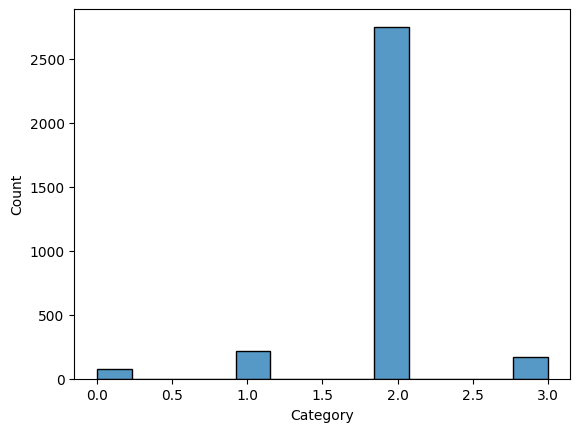

In [30]:
sns.histplot(x='Category',data=data_encoded)

In [31]:
X=data_encoded.drop(['Category'],axis=1)
y=data_encoded.Category

Index(['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_F', 'Sex_M', 'Sick_f',
       'Sick_t', 'Pregnant_f', 'Pregnant_t', 'Thyroid Surgery_f',
       'Thyroid Surgery_t', 'Goitre_f', 'Goitre_t', 'Tumor_f', 'Tumor_t'],
      dtype='object')

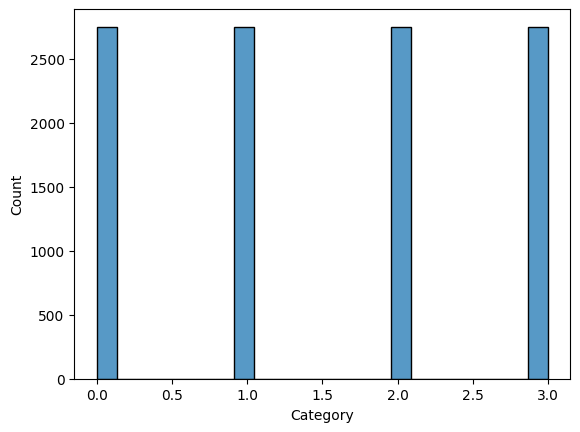

In [32]:
# To balance the dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
X_sampled,y_sampled=rdsmple.fit_resample(X,y)

X_sampled.shape


X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)
X_sampled



sns.histplot(y_sampled)





X_sampled.columns

In [33]:
# our data is balanced now

In [34]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_sampled,y_sampled,test_size=0.30,random_state=30)

In [35]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [36]:
X_train.head()

,num_pipeline__Age,num_pipeline__TSH,num_pipeline__T3,num_pipeline__TT4,num_pipeline__T4U,num_pipeline__FTI,num_pipeline__Sex_F,num_pipeline__Sex_M,num_pipeline__Sick_f,num_pipeline__Sick_t,num_pipeline__Pregnant_f,num_pipeline__Pregnant_t,num_pipeline__Thyroid Surgery_f,num_pipeline__Thyroid Surgery_t,num_pipeline__Goitre_f,num_pipeline__Goitre_t,num_pipeline__Tumor_f,num_pipeline__Tumor_t
0,0.230226,-0.288078,0.010529,-0.026870,-0.519497,0.145343,0.667729,-0.60369,0.240412,-0.240412,0.139945,-0.139945,0.073142,-0.073142,0.075785,-0.075785,0.234619,-0.234619
1,1.446333,-0.265209,-0.802941,-0.492771,-1.058991,-0.159656,0.667729,-0.60369,0.240412,-0.240412,0.139945,-0.139945,0.073142,-0.073142,0.075785,-0.075785,0.234619,-0.234619
2,-0.073800,-0.248119,0.084481,0.042152,0.721340,-0.261323,0.667729,-0.60369,0.240412,-0.240412,0.139945,-0.139945,0.073142,-0.073142,0.075785,-0.075785,0.234619,-0.234619
3,-1.796618,-0.282046,-0.063423,0.870421,-0.033952,0.873953,-1.497613,1.65648,0.240412,-0.240412,0.139945,-0.139945,0.073142,-0.073142,0.075785,-0.075785,0.234619,-0.234619
4,0.584924,-0.285816,-1.024797,0.111175,-0.573446,0.348676,0.667729,-0.60369,-4.159527,4.159527,0.139945,-0.139945,0.073142,-0.073142,0.075785,-0.075785,0.234619,-0.234619


In [37]:
y_train.head()

162      2
10575    3
810      2
5749     0
10972    3
Name: Category, dtype: int32

In [50]:
## Model Training
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,Lasso,Ridge,ElasticNet
from sklearn.multiclass import OneVsRestClassifier
# Create an OvR classifier using Logistic Regression
ovr_classifier = OneVsRestClassifier(LogisticRegression())
ovr_classifier.fit(X_train, y_train)
from sklearn.svm import SVC
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [51]:
regression=LogisticRegressionCV()
regression.fit(X_train,y_train)

c:\THYROID_PREDICTION\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\THYROID_PREDICTION\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LogisticRegressionCV()

In [52]:
OVR=OneVsRestClassifier(SVC())
OVR.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [53]:
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [44]:
elasticnet=ElasticNet()
elasticnet.fit(X_train,y_train)

ElasticNet()

In [45]:
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [46]:
regression.coef_

array([[-1.25202788e-02, -9.29029828e+00,  2.56655616e+00,
        -2.90428310e-01,  6.70417214e-02,  1.99478790e+00,
        -4.08654231e-01, -7.13926803e-01, -2.51666522e-02,
         2.51666522e-02, -2.43840410e-01,  2.43840410e-01,
         1.41948821e-01, -1.41948821e-01,  1.25365130e-01,
        -1.25365130e-01, -1.68573888e-01,  1.68573888e-01],
       [-1.81929647e-01,  4.45299280e+00, -3.94296640e-02,
        -8.59359590e-01,  3.49359311e-01, -6.88312473e-01,
         1.58395943e-01,  9.73742549e-02, -2.29439473e-02,
         2.29439473e-02,  3.42562663e-01, -3.42562663e-01,
        -8.41527115e-02,  8.41527115e-02,  1.82974027e-01,
        -1.82974027e-01,  7.07174158e-04, -7.07174158e-04],
       [-2.14183810e-02,  2.11590676e+00,  7.81741963e-01,
         7.27792795e-01, -2.01941157e-01, -1.17314977e+00,
         9.65352800e-02,  2.59187398e-01,  1.83584109e-02,
        -1.83584109e-02, -2.00070860e-01,  2.00070860e-01,
        -1.59040218e-01,  1.59040218e-01, -1.17231208e

In [47]:
regression.intercept_

array([-2.88438991,  1.1636442 ,  1.75432658, -0.03358087])

In [48]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [55]:
data_encoded.shape

(3220, 19)

In [54]:
## Train multiple models

models={
    'LogisticRegressionCV':LogisticRegressionCV(),
    'OneVsRestClassifier':OneVsRestClassifier(SVC()),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

#clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
#clf.predict(X[:2, :])

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    
    
    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

c:\THYROID_PREDICTION\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\THYROID_PREDICTION\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LogisticRegressionCV
Model Training Performance
RMSE: 0.7922192010350713
MAE: 0.3387829246139873
R2 score 49.36182363488963


OneVsRestClassifier
Model Training Performance
RMSE: 0.7347191925190798
MAE: 0.27459884953072966
R2 score 56.44579427930931


Lasso
Model Training Performance
RMSE: 1.1132851329419748
MAE: 0.9947019630748835
R2 score -3.3964424095422885e-05


Ridge
Model Training Performance
RMSE: 0.8451438548108183
MAE: 0.7243233328979387
R2 score 42.37000198957661


Elasticnet
Model Training Performance
RMSE: 1.0424522953847954
MAE: 0.9455833383416924
R2 score 12.320168096646999


